In [2]:
import numpy as np
import pandas as pd

In [3]:
with open("data\spam.csv") as f:
    lines = f.readlines()
X, Y = [], []
for line in lines:
    f = 1 if line[0] == 'h' else 0
    Y.append(f)
    X.append(''.join(filter(lambda x: (x == ' ' or x.isalpha()), line[4 + f:-4])))

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [5]:
X_train = CountVectorizer().fit_transform(X)
X_train_tf = TfidfTransformer(use_idf=False).fit(X_train).transform(X_train)
X_train_tfidf = TfidfTransformer().fit_transform(X_train)
print(X_train.shape)
print(X_train_tf.shape)
print(X_train_tfidf.shape)
print(X_train_tfidf[1:2])

(379, 17)
(379, 17)
(379, 17)
  (0, 11)	0.7071067811865475
  (0, 10)	0.7071067811865475


In [6]:
import time
import yaml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from src.functions import calc, stats

with open('config.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tfidf,
    Y,
    test_size=config['test_size'],
    random_state=config['train_test_split_random_state']
)

## KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

segment = range(2, 20)
best_k, best_score, accuracy = calc(
    segment,
    lambda k: KNeighborsClassifier(n_neighbors=k),
    X_train,
    y_train,
    config
)

Best k =  2
Best score =  1.0
False positive error =  0.0
True negative error =  0.0
False negative =  1.0
True positive =  1.0
TIME =  0:00:00


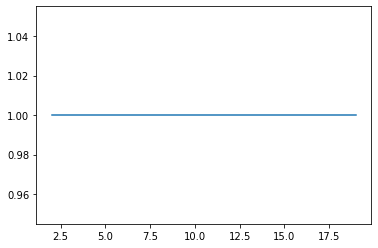

In [8]:
print ("Best k = ", best_k)
print ("Best score = ", best_score)
stats(
    y_test,
    KNeighborsClassifier(n_neighbors=best_k)
    .fit(X_train, y_train)
    .predict(X_test)
)
plt.plot(segment, accuracy)
plt.show()

## MultinomialNB

In [9]:
from sklearn.naive_bayes import MultinomialNB


segment = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
best_k, best_score, accuracy = calc(
    segment,
    lambda k: MultinomialNB(alpha=k, class_prior=None, fit_prior=True),
    X_train,
    y_train,
    config
)

Best k =  1e-06
Best score =  1.0
False positive error =  0.0
True negative error =  0.0
False negative =  1.0
True positive =  1.0
TIME =  0:00:00.001002


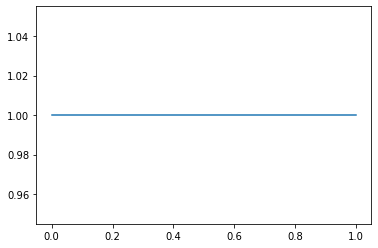

In [10]:
print ("Best k = ", best_k)
print ("Best score = ", best_score)
stats(
    y_test,
    MultinomialNB(alpha=best_k, class_prior=None, fit_prior=True)
    .fit(X_train, y_train)
    .predict(X_test)
)
plt.plot(segment, accuracy)
plt.show()

## LogisticRegression 
(you need to check for penalty, because only 'none' or 'l2' available. So the first estimation could be l2 as well)

In [11]:
from sklearn.linear_model import LogisticRegression


segment = [0.001, 0.001, 0.01, 0.1, 1, 5, 10]
best_k_l1, best_score_l1, accuracy_l1 = calc(
    segment,
    lambda k: LogisticRegression(C=k),
    X_train,
    y_train,
    config
)

best_k_l2, best_score_l2, accuracy_l2 = calc(
    segment,
    lambda k: LogisticRegression(C=k, penalty="l2"),
    X_train,
    y_train,
    config
)

Best C =  1
Best score (l1 penalty) =  1.0
Best C =  1
Best score (l2 penalty) =  1.0
False positive error =  0.0
True negative error =  0.0
False negative =  1.0
True positive =  1.0
TIME =  0:00:00.000999


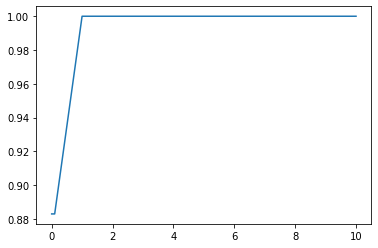

In [12]:
print ("Best C = ", best_k_l1)
print ("Best score (l1 penalty) = ", best_score_l1)
print ("Best C = ", best_k_l2)
print ("Best score (l2 penalty) = ", best_score_l2)
stats(
    y_test,
    LogisticRegression(C=best_k_l1)
    .fit(X_train, y_train)
    .predict(X_test)
)
plt.plot(segment, accuracy_l1)
plt.show()

## DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

segment = np.arange(2, 50, 5)
best_k, best_score, accuracy = calc(
    segment,
    lambda k: DecisionTreeClassifier(max_depth=k),
    X_train,
    y_train,
    config
)

Best C =  2
Best score (best splitter) =  1.0
False positive error =  0.0
True negative error =  0.0
False negative =  1.0
True positive =  1.0
TIME =  0:00:00


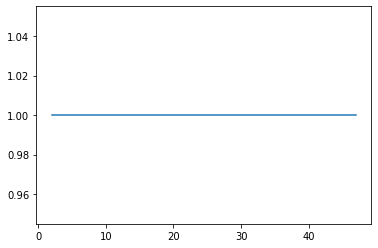

In [14]:
print ("Best C = ", best_k)
print ("Best score (best splitter) = ", best_score)
stats(
    y_test,
    DecisionTreeClassifier(max_depth=best_k)
    .fit(X_train, y_train)
    .predict(X_test)
)
plt.plot(segment, accuracy)
plt.show()

## SVC

In [15]:
from sklearn.svm import SVC


segment = ["linear", "poly", "rbf", "sigmoid"]
best_k, best_score, accuracy = calc(
    segment,
    lambda k: SVC(kernel=k),
    X_train,
    y_train,
    config
)

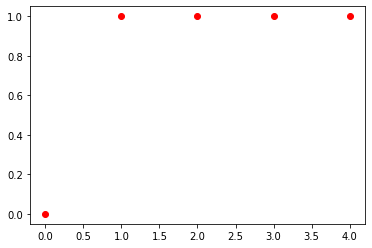

Best kernel =  linear
Best score =  1.0
False positive error =  0.0
True negative error =  0.0
False negative =  1.0
True positive =  1.0
TIME =  0:00:00


In [16]:
accuracy.insert(0, 0)    
plt.plot(np.arange(len(segment) + 1), accuracy, 'ro')
plt.show()
print ("Best kernel = ", best_k)
print ("Best score = ", best_score)
stats(
    y_test,
    SVC(kernel=best_k)
    .fit(X_train, y_train)
    .predict(X_test)
)